## Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [3]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Magic word for producing visualizations in notebook
%matplotlib inline

### 1. Load Data

In [4]:
azdias = pd.read_csv('../arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('../arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# check out data dimension
print(azdias.shape)
print(customers.shape)

(891221, 366)
(191652, 369)


In [6]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [7]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [8]:
# remove redundant columns in customers data
print(np.setdiff1d(customers.columns, azdias.columns))

customers.drop(columns=['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], inplace=True)
print(customers.shape)

['CUSTOMER_GROUP' 'ONLINE_PURCHASE' 'PRODUCT_GROUP']
(191652, 366)


In [9]:
# Concatenate azdias and customers data, add CLASS column containing class labels 
azdias['CLASS'] = 0
customers['CLASS'] = 1
demo_data = pd.concat([azdias, customers], axis=0)

In [10]:
# Delete unused data to save space
del azdias
del customers

In [11]:
# Store features and labels seperately
demo_labels = demo_data['CLASS']
demo_features = demo_data.drop(columns = ['CLASS'])

In [12]:
# Delete unused data to save space
del demo_data

In [13]:
demo_features.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [14]:
demo_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082873 entries, 0 to 191651
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 3.0+ GB


### 2. Data Cleaning 
Based on the information files beening provied, there is 314 features with description; however, there is 366 features in the data. Let's check out the unique values of each feature against the description.

In [15]:
# Examinate unique values of each feature with a generator
features_generator = ("{}: {}".format(feature_name, demo_features[feature_name].unique()) for feature_name in demo_features.columns)

In [16]:
next(features_generator, "ALL FEATURES EXAMINATED!")

'LNR: [910215 910220 910225 ... 148813 148852 148883]'

#### Problems:
1. A typo exists by feature _KBA13_CCM_1401_2500_
2. Missing value indicators of several features are either not consistent with or can simply not been found in the information files
3. A few features described in the information files don’t exist in the data; many features in the data don’t have corresponding descriptions in the information files; some features show up in both positions without consistent names

#### Solutions:

Creating a new speedsheet information file for reference: the column _Feature_ contains all feature names mentioned in the given information files without those not showing up in the data and the names are modified to align with column names of the data; _Description_ describes the features; _NaN Indicators_ missing or unknow values; _Type_ the statitical data type of features; _Notes_ additional comments.

In [17]:
# Load in the new information file 
features_info = pd.read_excel('../arvato_data/DIAS_features_info.xlsx').set_index('Feature')

In [18]:
features_info.head(10)

,Description,NaN_Indicators,Data_Type,Notes
Feature,,,,
AGER_TYP,best-ager typology,-1,categorical,NaN
ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0, 9",ordinal,NaN
ALTER_HH,main age within the household,0,ordinal,NaN
ANREDE_KZ,gender,"-1, 0",categorical,NaN
ANZ_HAUSHALTE_AKTIV,number of households in the building,"-1, 0",discrete,"NaN indicators -1,0"
ANZ_HH_TITEL,number of academic title holder in building,-1,discrete,NaN indicator -1
ANZ_PERSONEN,number of adult persons in the household,"-1, 0",discrete,"NaN indicators -1,0"
ANZ_TITEL,number of professional title holder in household,-1,discrete,NaN indicator -1
BALLRAUM,distance to next urban centre,-1,ordinal,NaN


#### 1. Correct The Typo by Renaming Feature *KBA13_CCM_1401_2500*  with *KBA13_CCM_1400_2500* 

In [19]:
demo_features.rename({'KBA13_CCM_1401_2500': "KBA13_CCM_1400_2500"}, axis=1, inplace=True)

In [20]:
# Sanity Check
print('KBA13_CCM_1400_2500' in demo_features.columns)

True


#### 2. Replace Bad Missing Value Indicators with Proper Values and Correct the Data Types of Corresponding Features

In [21]:
# Feature CAMEO_DEUG_2015
demo_features.CAMEO_DEUG_2015 = demo_features.CAMEO_DEUG_2015.replace(['X', np.nan], -1).astype('int64')

# Feature CAMEO_DEU_2015
demo_features.CAMEO_DEU_2015 = demo_features.CAMEO_DEU_2015.replace(['XX', np.nan], -1)

# Feature CAMEO_INTL_2015
demo_features.CAMEO_INTL_2015 = demo_features.CAMEO_INTL_2015.replace(['XX', np.nan], -1).astype('int64')

In [22]:
# Sanity Check
print('CAMEO_DEUG_2015: {}'.format(demo_features.CAMEO_DEUG_2015.unique()))
print('CAMEO_DEU_2015: {}'.format(demo_features.CAMEO_DEU_2015.unique()))
print('CAMEO_INTL_2015: {}'.format(demo_features.CAMEO_INTL_2015.unique()))

CAMEO_DEUG_2015: [-1  8  4  2  6  1  9  5  7  3]
CAMEO_DEU_2015: [-1 '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C']
CAMEO_INTL_2015: [-1 51 24 12 43 54 22 14 13 15 33 41 34 55 25 23 31 52 35 45 44 32]


#### 3. Select Only Those Features with Descriptions (Exist in The Information File)

In [23]:
demo_features = demo_features[features_info.index]

In [24]:
demo_features.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,...,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,-1,2,NaN,1,NaN,NaN,NaN,NaN,NaN,-1,...,3,1,-1,NaN,NaN,-1,NaN,NaN,NaN,3
1,-1,1,0.0,2,11.0,0.0,2.0,0.0,6.0,8,...,6,1,3,1.0,0.0,2,9.0,4.0,3.0,5
2,-1,3,17.0,2,10.0,0.0,1.0,0.0,2.0,4,...,3,4,2,0.0,0.0,1,9.0,2.0,3.0,5
3,2,4,13.0,2,1.0,0.0,0.0,0.0,4.0,2,...,4,4,1,0.0,0.0,1,9.0,7.0,NaN,3
4,-1,3,20.0,1,3.0,0.0,4.0,0.0,2.0,6,...,2,7,2,0.0,0.0,2,9.0,3.0,2.0,4


In [25]:
demo_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082873 entries, 0 to 191651
Columns: 309 entries, AGER_TYP to ZABEOTYP
dtypes: float64(218), int64(89), object(2)
memory usage: 2.5+ GB


#### 4. Replace Missing Value Indicators with `np.nan` 

In [26]:
# Look at unique values of missing value indicator
features_info.NaN_Indicators.unique()

array(['-1', '-1, 0, 9', '0', '-1, 0', '10', '-1, 9'], dtype=object)

In [27]:
# Replace all missing value indicators with np.nan
NaN_indicators_list = []

for NaN_indicator_str in features_info.NaN_Indicators:
    NaN_indicators_list.append(list(map(int, NaN_indicator_str.split(','))))

for i, NaN_indicator in enumerate(NaN_indicators_list):
    demo_features.loc[:, demo_features.columns[i]].replace(NaN_indicator, np.nan, inplace=True)

In [28]:
demo_features_clean = demo_features

demo_features_clean.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,...,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,NaN,2.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,NaN,1.0,NaN,2,11.0,0.0,2.0,0.0,6.0,8.0,...,6,1,3.0,1.0,NaN,2.0,9.0,4.0,3.0,5
2,NaN,3.0,17.0,2,10.0,0.0,1.0,0.0,2.0,4.0,...,3,4,2.0,0.0,NaN,1.0,9.0,2.0,3.0,5
3,2.0,4.0,13.0,2,1.0,0.0,NaN,0.0,4.0,2.0,...,4,4,1.0,0.0,NaN,1.0,9.0,7.0,NaN,3
4,NaN,3.0,20.0,1,3.0,0.0,4.0,0.0,2.0,6.0,...,2,7,2.0,0.0,NaN,2.0,9.0,3.0,2.0,4


In [29]:
# Delete unused data to save space
del demo_features

### 3. Data Preprocessing
In this part, we will remove data with high missing value proportion, then process the remaining features according to their statistical data types.

In [30]:
demo_features_clean.shape

(1082873, 309)

#### 1. Remove Rows & Columns with Too Many Missing Values

##### Columns

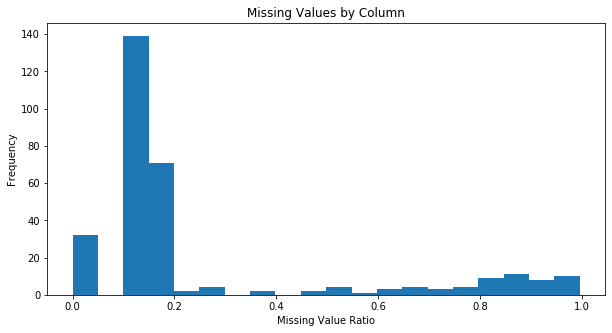

In [31]:
# Plot missing value distribution along columns
NaN_prop_cols = demo_features_clean.isna().mean(axis=0)

plt.figure(figsize = (10, 5))
NaN_prop_cols.plot(kind='hist', bins=20)
plt.xlabel('Missing Value Ratio')
plt.title('Missing Values by Column')

plt.show()

In [32]:
# Threshold for columns is 20%
NaN_thresh_cols = 0.2

In [33]:
# Subset columns with the threshold  
index_cols_sub = NaN_prop_cols < NaN_thresh_cols

demo_features_sub = demo_features_clean.loc[:, index_cols_sub]

In [34]:
demo_features_sub.shape

(1082873, 242)

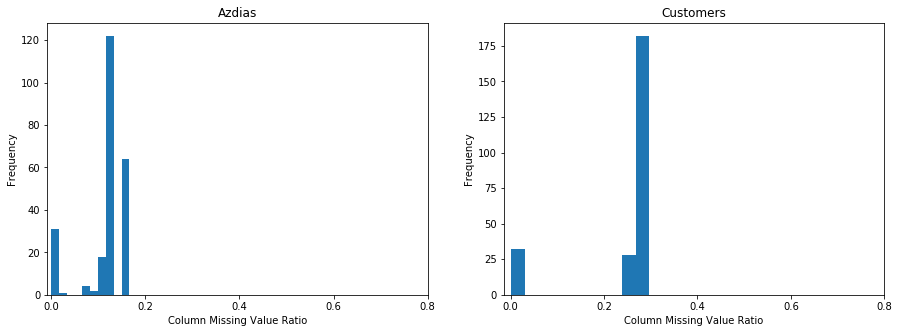

In [35]:
# Sanity Check
# Plot missing value distribution of the remaining columns of the 2 classes
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
demo_features_sub[demo_labels==0].isna().mean(axis=0).plot(kind='hist')
plt.title('Azdias')
plt.xlabel('Column Missing Value Ratio')
plt.xticks(np.arange(0, 1, step=0.2))

plt.subplot(1, 2, 2)
demo_features_sub[demo_labels==1].isna().mean(axis=0).plot(kind='hist')
plt.title('Customers')
plt.xlabel('Column Missing Value Ratio')
plt.xticks(np.arange(0, 1, step=0.2))

plt.show()

As a matter of fact, the missing value proportion of customers is generally higher as azdias. Overall, the chosen threshold  was ok.

##### Rows

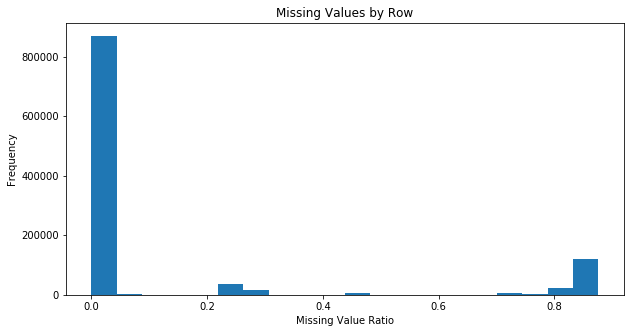

In [36]:
# Plot missing value distribution along the rows
NaN_prop_rows = demo_features_sub.isna().mean(axis=1)

plt.figure(figsize = (10, 5))
NaN_prop_rows.plot(kind='hist', bins=20)
plt.xlabel('Missing Value Ratio')
plt.title('Missing Values by Row')

plt.show()

In [37]:
# Set row threshold to 40%
NaN_thresh_rows = 0.4

In [38]:
# Subset rows with row threshold  
index_rows_sub = NaN_prop_rows < NaN_thresh_rows

demo_features_sub = demo_features_sub.loc[index_rows_sub, :]

demo_labels_sub = demo_labels[index_rows_sub]

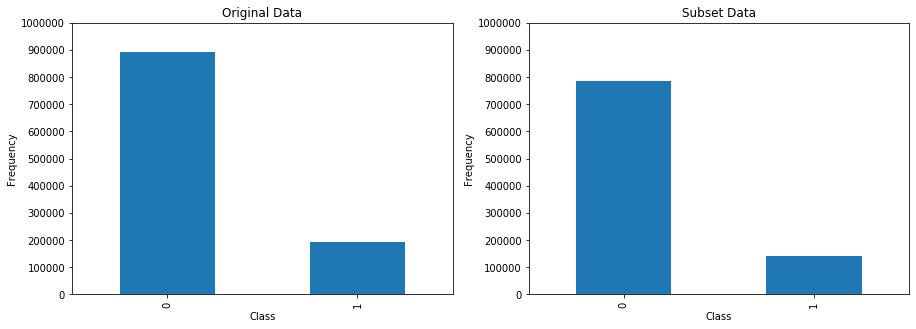

In [39]:
# Sanity Check
# Plot class distributions before and after subsetting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
demo_labels.value_counts().plot(kind='bar')
plt.yticks(np.arange(0, 1100000, step=100000))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Original Data')

plt.subplot(1, 2, 2)
demo_labels_sub.value_counts().plot(kind='bar')
plt.yticks(np.arange(0, 1100000, step=100000))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Subset Data')

plt.show()

As it showed, deleteing those rows has very little impact of class distributions.

In [40]:
# Reset the index
demo_features_sub.reset_index(drop=True, inplace=True)

demo_labels_sub.reset_index(drop=True, inplace=True)

In [41]:
print(demo_features_sub.shape)
print(demo_labels_sub.shape)

(925792, 242)
(925792,)


In [42]:
demo_features_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925792 entries, 0 to 925791
Columns: 242 entries, ALTERSKATEGORIE_GROB to ZABEOTYP
dtypes: float64(216), int64(24), object(2)
memory usage: 1.7+ GB


In [43]:
# Delete unused data to save space
del demo_features_clean

#### 2. Dealing with Statistical Data Types

In [44]:
# Extract statistical data type information
data_type_sub = features_info.Data_Type[index_cols_sub.to_numpy()]

data_type_sub.value_counts()

ordinal        219
categorical     10
mixed            7
discrete         6
Name: Data_Type, dtype: int64

##### Ordinal
We will treat the ordinal data as numerical data with descrete values.

In [45]:
# Subset ordinal features
features_ordinal = demo_features_sub[demo_features_sub.columns[data_type_sub == 'ordinal']]

In [46]:
# Check out unique values of ordinal features
["{}: {}".format(col_name, features_ordinal[col_name].unique()) for col_name in features_ordinal.columns]


['ALTERSKATEGORIE_GROB: [ 1.  3.  4.  2. nan]',
 'BALLRAUM: [ 6.  2.  4.  3.  7.  1.  5. nan]',
 'CAMEO_DEUG_2015: [ 8.  4.  2.  6.  1.  9.  5.  7.  3. nan]',
 'CJT_GESAMTTYP: [ 5.  3.  2.  4.  1.  6. nan]',
 'EWDICHTE: [ 3.  4.  2.  5.  6.  1. nan]',
 'FINANZTYP: [1 6 5 2 4 3]',
 'FINANZ_ANLEGER: [5 2 1 4 3]',
 'FINANZ_HAUSBAUER: [5 2 3 4 1]',
 'FINANZ_MINIMALIST: [1 4 3 2 5]',
 'FINANZ_SPARER: [5 4 2 3 1]',
 'FINANZ_UNAUFFAELLIGER: [4 3 1 2 5]',
 'FINANZ_VORSORGER: [2 1 5 4 3]',
 'GEBAEUDETYP_RASTER: [ 3.  4.  5.  2.  1. nan]',
 'HH_EINKOMMEN_SCORE: [6. 4. 1. 5. 3. 2.]',
 'INNENSTADT: [ 8.  4.  6.  1.  7.  3.  5.  2. nan]',
 'KBA05_ALTER1: [ 3.  2.  0.  1.  4. nan]',
 'KBA05_ALTER2: [ 4.  3.  5.  2. nan  1.]',
 'KBA05_ALTER3: [ 1.  3.  4.  2. nan  5.]',
 'KBA05_ALTER4: [ 4.  3.  0.  5. nan  2.  1.]',
 'KBA05_ANHANG: [ 0.  1. nan  2.  3.]',
 'KBA05_ANTG1: [ 0.  1.  4.  2.  3. nan]',
 'KBA05_ANTG2: [ 0.  3.  1.  4.  2. nan]',
 'KBA05_ANTG3: [ 0.  1. nan  3.  2.]',
 'KBA05_ANTG4: [ 2.  

In [47]:
# Impute missing values with the mean
features_ordinal_imputed = features_ordinal.fillna(features_ordinal.mean())

In [48]:
# Sanity Check
assert features_ordinal_imputed.notnull().any().any()

In [49]:
# Remove redundant variable
del features_ordinal

##### Discrete
Discrete data is numerical data with descrete values.

In [50]:
# Subset discrete features
features_discrete = demo_features_sub[demo_features_sub.columns[data_type_sub == 'discrete']]

In [51]:
# Check out statistical distributions of discrete features
features_discrete.describe()

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR
count,917274.000000,919986.000000,886144.000000,925792.000000,925792.000000,925792.000000
mean,7.844304,0.043691,1.896574,0.006578,626.908028,1993.123970
std,15.372099,0.350529,1.176710,0.086543,340.528955,2.947361
min,1.000000,0.000000,1.000000,0.000000,0.000000,1985.000000
25%,1.000000,0.000000,1.000000,0.000000,390.000000,1992.000000
50%,3.000000,0.000000,1.000000,0.000000,556.000000,1992.000000
75%,9.000000,0.000000,2.000000,0.000000,786.000000,1993.000000
max,595.000000,20.000000,45.000000,5.000000,2300.000000,2013.000000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


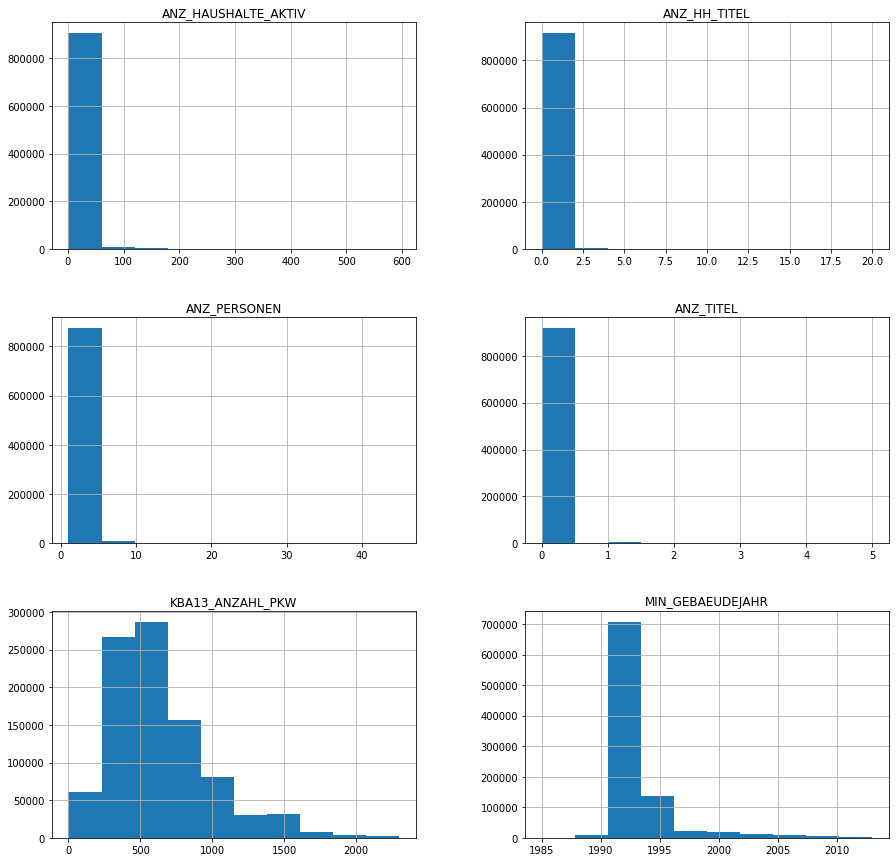

In [52]:
# Plot histograms of discrete features
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
features_discrete.hist(ax=ax, bins=10)
plt.show()

**Conclusion:** *ANZ_HH_TITEL*, *ANZ_PERSONEN* and *ANZ_TITEL* have extreme low variance, thus they are removed; the others seem to suffer from outlier problem, we will deal with these issues.

In [53]:
features_discrete.columns

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR'],
      dtype='object')

In [54]:
# drop low-variance features
features_discrete = features_discrete.drop(['ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL'], axis=1)

In [55]:
# Sanity Check
features_discrete.shape

(925792, 3)

In [56]:
# Detect outliers with Z-score metric, choose 3 standard deviations as threshold
outlier_upper, outlier_lower = features_discrete.mean() + 3*features_discrete.std(), features_discrete.mean() - 3*features_discrete.std()


In [57]:
# Replace outliers with np.nan
features_discrete[(features_discrete > outlier_upper) | (features_discrete < outlier_lower)] = np.nan

In [58]:
# Sanity Check
features_discrete.describe()

,ANZ_HAUSHALTE_AKTIV,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR
count,903082.000000,912922.000000,894380.000000
mean,6.443814,609.566904,1992.678557
std,7.993341,309.104455,1.683234
min,1.000000,0.000000,1985.000000
25%,1.000000,388.000000,1992.000000
50%,3.000000,551.000000,1992.000000
75%,9.000000,773.000000,1992.000000
max,53.000000,1600.000000,2001.000000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


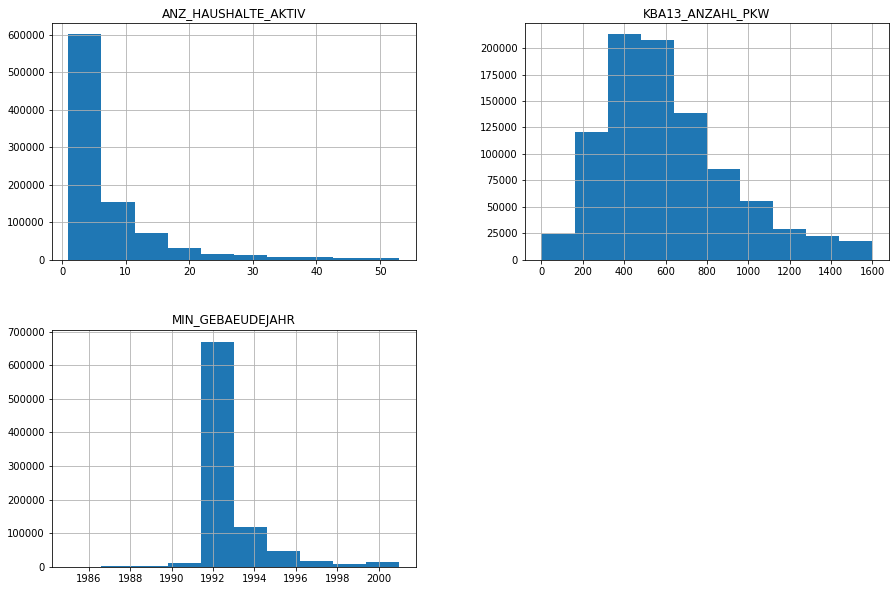

In [59]:
# Display histograms without ouliers
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
features_discrete.hist(ax=ax, bins=10)
plt.show()

**Conclusion:** log-transform *ANZ_HAUSHALTE_AKTIV* as it's terriblely left-skewed.

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([263374., 141593.,  69445.,  47137., 116854.,  92980.,  93004.,
         37322.,  25170.,  16203.]),
 array([0.        , 0.39702919, 0.79405838, 1.19108757, 1.58811677,
        1.98514596, 2.38217515, 2.77920434, 3.17623353, 3.57326272,
        3.97029191]),
 <a list of 10 Patch objects>)

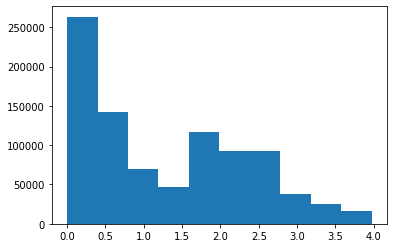

In [60]:
# Log-transformation of ANZ_HAUSHALTE_AKTIV
features_discrete.ANZ_HAUSHALTE_AKTIV = np.log(features_discrete.ANZ_HAUSHALTE_AKTIV)

# Display the result
plt.hist(features_discrete.ANZ_HAUSHALTE_AKTIV, bins=10)

**Conclusion:** log-transformation seems to work pretty well.

In [61]:
# Impute missing values with the Mean
features_discrete_imputed = features_discrete.fillna(features_discrete.mean())

# Sanity Check
assert features_discrete_imputed.notnull().all().all()

In [62]:
# Remove redundant variable
del features_discrete

##### Mixed
Mixed data is categorical data with partial orders, we will treat it as categorical data.

In [63]:
# Select mixed features
features_mixed = demo_features_sub[demo_features_sub.columns[data_type_sub == 'mixed']].astype('category')

In [64]:
features_mixed.head()

,CAMEO_DEU_2015,CAMEO_INTL_2015,LP_FAMILIE_FEIN,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_STATUS_FEIN,PRAEGENDE_JUGENDJAHRE
0,8A,51.0,5.0,21.0,6.0,2.0,14.0
1,4C,24.0,1.0,3.0,1.0,3.0,15.0
2,2A,12.0,NaN,NaN,NaN,9.0,8.0
3,6B,43.0,10.0,32.0,10.0,3.0,8.0
4,8C,54.0,1.0,8.0,2.0,4.0,3.0


**Conclusion:** we exclude *CAMEO_INTL_2015, LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB and LP_STATUS_FEIN* since the information those features could provide is already contained in other variables.

In [65]:
# Eliminate CAMEO_INTL_2015, LP_FAMILIE_GROB, LP_LEBENSPHASE_GROB and LP_STATUS_FEIN
features_mixed = features_mixed.drop(['CAMEO_INTL_2015', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_FEIN'], axis=1)


In [66]:
# Sanity Check
features_mixed.describe()

,CAMEO_DEU_2015,LP_FAMILIE_FEIN,PRAEGENDE_JUGENDJAHRE
count,921451,885524.0,897055.0
unique,44,11.0,15.0
top,6B,1.0,14.0
freq,65656,433008.0,183484.0


In [67]:
print(features_mixed.shape)

(925792, 3)


##### Categorical

In [68]:
# Select categorical features
features_categorical = demo_features_sub[demo_features_sub.columns[data_type_sub == 'categorical']].astype('category')

In [69]:
# Check out statistical distributions of discrete features
features_categorical.describe()

,ANREDE_KZ,GEBAEUDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,NATIONALITAET_KZ,OST_WEST_KZ,SHOPPER_TYP,SOHO_KZ,VERS_TYP
count,925792,925792.0,918002.0,925792,887396.0,890381.0,925792,887396.0,925792.0,887396.0
unique,2,7.0,12.0,2,3.0,3.0,2,4.0,2.0,2.0
top,1,1.0,12.0,0,2.0,1.0,W,1.0,0.0,2.0
freq,469718,547090.0,133708.0,683049,347097.0,792019.0,748444,279142.0,917805.0,457339.0


In [70]:
# Delete redundant varible
del demo_features_sub

##### Merging Data Types

For convenience, we concatenate ordinal and discrete typed features as numerical data, mixed and categorical typed features as categorical data.

In [71]:
features_numerical_imputed = pd.concat([features_ordinal_imputed, features_discrete_imputed], axis=1)
features_categorical = pd.concat([features_mixed, features_categorical], axis=1)

In [72]:
# Delete redundant varibles
del features_ordinal_imputed, features_discrete_imputed, features_mixed

#### 3. Scaling Numerical Features


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
# Standardize numerical features
scaler = StandardScaler()
features_numerical_scaled = pd.DataFrame(scaler.fit_transform(features_numerical_imputed), columns=features_numerical_imputed.columns)


In [75]:
features_numerical_scaled.describe()

,ALTERSKATEGORIE_GROB,BALLRAUM,CAMEO_DEUG_2015,CJT_GESAMTTYP,EWDICHTE,FINANZTYP,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,...,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP,ANZ_HAUSHALTE_AKTIV,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR
count,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,...,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05,9.257920e+05
mean,2.416198e-13,-6.668545e-14,1.993866e-13,-1.613988e-13,1.400916e-14,1.656602e-13,5.124178e-13,-1.501040e-13,-9.476678e-14,-9.354424e-15,...,-4.656376e-14,7.028464e-13,-7.061738e-13,5.723226e-13,-3.377518e-16,-3.679613e-14,-3.008738e-13,-3.333662e-13,-3.442293e-15,1.174630e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.883717e+00,-1.461758e+00,-1.739179e+00,-1.582955e+00,-1.722371e+00,-1.405346e+00,-1.117455e+00,-1.476090e+00,-1.601320e+00,-1.026975e+00,...,-1.672936e+00,-1.496149e+00,-1.755017e+00,-3.865329e+00,-2.035237e+00,-1.835293e+00,-1.556558e+00,-1.185446e+00,-1.985895e+00,-4.641208e+00
25%,-8.929480e-01,-1.001573e+00,-9.402965e-01,-9.318789e-01,-1.134687e+00,-9.154541e-01,-1.117455e+00,-7.610998e-01,-8.864705e-01,-1.026975e+00,...,-1.145802e+00,-9.207299e-01,-1.240686e+00,-2.533943e-02,-5.114542e-01,-6.799899e-01,-1.629840e-01,-1.185446e+00,-7.153222e-01,-4.101454e-01
50%,9.782107e-02,3.789796e-01,2.580266e-01,5.782714e-16,4.068102e-02,5.542203e-01,-4.418671e-01,-4.610947e-02,-1.716210e-01,-3.514166e-01,...,-9.153516e-02,2.301080e-01,3.023068e-01,5.232305e-01,-5.114542e-01,1.026116e-15,-1.629840e-01,-1.572224e-01,-1.745145e-01,-4.101454e-01
75%,1.088590e+00,8.391639e-01,1.056909e+00,1.021348e+00,6.283651e-01,1.044112e+00,9.093079e-01,6.688808e-01,1.258078e+00,9.996996e-01,...,9.627320e-01,8.055270e-01,8.166379e-01,5.232305e-01,5.044008e-01,1.052965e+00,5.338032e-01,7.607643e-01,5.161557e-01,1.374332e-13
max,1.088590e+00,1.299348e+00,1.456350e+00,1.672424e+00,1.216049e+00,1.044112e+00,1.584895e+00,1.383871e+00,1.258078e+00,1.675258e+00,...,1.489866e+00,1.956365e+00,1.330969e+00,5.232305e-01,2.028183e+00,1.052965e+00,1.927377e+00,2.530466e+00,3.226710e+00,5.029792e+00


### 4. Dimensionality Reduction with PCA

In [76]:
# Fit PCA model with 90% variance reserved and transform the original features to PCA features
pca = PCA(n_components=0.9)
features_PCA = pca.fit_transform(features_numerical_scaled)

In [77]:
print(features_numerical_scaled.shape)
print(features_PCA.shape)

(925792, 222)
(925792, 113)


In [78]:
# Check out explained variance ratios of the principal components
pca.explained_variance_ratio_

array([0.09001775, 0.0709946 , 0.03968931, 0.03298661, 0.02871145,
       0.02637272, 0.02432232, 0.02230852, 0.02128348, 0.01975395,
       0.01723178, 0.01552393, 0.01437448, 0.01374897, 0.01315877,
       0.01265559, 0.0122826 , 0.01098903, 0.01088617, 0.01035357,
       0.0098743 , 0.00952008, 0.0088004 , 0.00868379, 0.00840486,
       0.00807612, 0.00784669, 0.00756045, 0.0072754 , 0.00714193,
       0.00684464, 0.0066998 , 0.00659744, 0.00641177, 0.00627714,
       0.00624415, 0.00613641, 0.0060412 , 0.00597511, 0.00586891,
       0.00576129, 0.00549813, 0.0054664 , 0.00540964, 0.00530975,
       0.00511035, 0.00494336, 0.00488137, 0.0048156 , 0.00472322,
       0.00465668, 0.0045717 , 0.00441679, 0.0043405 , 0.00428731,
       0.00423085, 0.00417901, 0.00413211, 0.00411199, 0.00401553,
       0.00397689, 0.00391437, 0.00387052, 0.00383094, 0.00380138,
       0.00378756, 0.00374397, 0.00370415, 0.00364913, 0.00361314,
       0.00357833, 0.00352793, 0.00344247, 0.0034177 , 0.00338

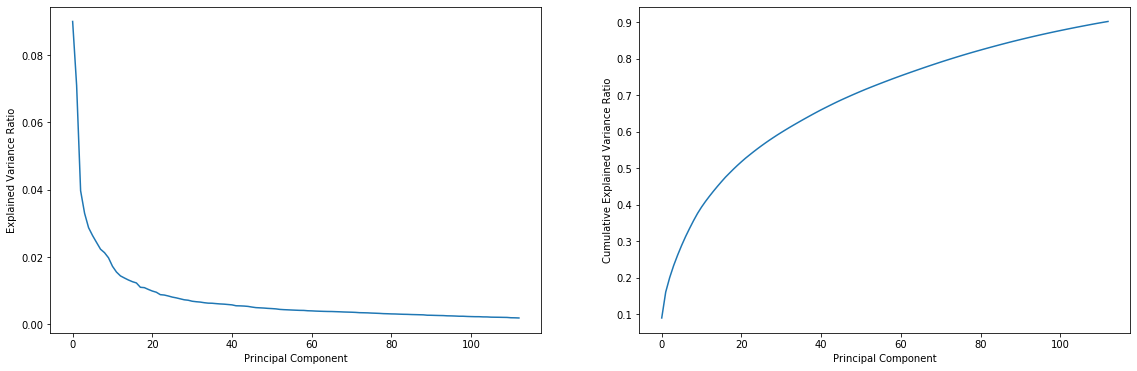

In [79]:
# Plot explained variance ratios and cumulative explained variance ratios
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.subplots_adjust(wspace=0.2, left=0, right=1.5)
plt.show()

### 5. Principal Components Interpretation

In [80]:
# Extract the descriptions of the original features
feature_names = features_numerical_scaled.columns.values
feature_descriptions = features_info.loc[feature_names, 'Description']
feature_descriptions

Feature
ALTERSKATEGORIE_GROB         age classification through prename analysis 
BALLRAUM                                   distance to next urban centre 
CAMEO_DEUG_2015                    CAMEO classification 2015 - Uppergroup
CJT_GESAMTTYP                                   customer journey typology
EWDICHTE                      density of inhabitants per square kilometer
                                              ...                        
W_KEIT_KIND_HH            likelihood of a child present in this household
ZABEOTYP                                 typification of energy consumers
ANZ_HAUSHALTE_AKTIV                  number of households in the building
KBA13_ANZAHL_PKW                               number of cars in the PLZ8
MIN_GEBAEUDEJAHR        year the building was first mentioned in our d...
Name: Description, Length: 222, dtype: object

In [81]:
def display_makeup_of_principal_component(principal_components, feature_names, feature_descriptions, n_principal_component, n_weights=15):
    """ 
    The function displays weights and descriptions of the original features
    included in a particular principal component.
    """
    # get the list of weights from a row in components matrix
    principal_component_n = principal_components[n_principal_component-1, :]

    # match weights to features
    comps = pd.DataFrame(np.stack([principal_component_n, feature_names], axis=1), columns=['Weights', 'Features'])

    # sort by the largest n_weights by magnitude since weights could be neg/pos
    comps['Abs_Weights'] = comps['Weights'].apply(np.abs)
    sorted_weights_data = comps.sort_values('Abs_Weights', ascending=False).head(n_weights)
    
    # display using seaborn
    plt.subplots(figsize=(10,5))
    ax = sns.barplot(data=sorted_weights_data,
                     x='Weights',
                     y='Features',
                     palette="Blues_d")
    
    ax.set_title("Principal Component Makeup, Component #" + str(n_principal_component))
    plt.show()
    
    # print features descriptions
    feature_weights_descriptions = sorted_weights_data.set_index('Features')
    feature_weights_descriptions['Descriptions'] = feature_descriptions[sorted_weights_data['Features']].values
    feature_weights_descriptions['Associations'] = feature_weights_descriptions['Weights'].apply(lambda a: 'Positive' if a>0 else 'Negative')
    
    print(feature_weights_descriptions[['Descriptions', 'Associations']])

#### Principal Component 1

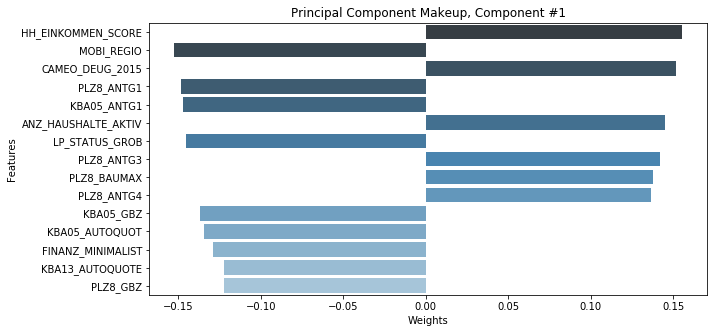

                                                    Descriptions Associations
Features                                                                     
HH_EINKOMMEN_SCORE               estimated household net income      Positive
MOBI_REGIO                                       moving patterns     Negative
CAMEO_DEUG_2015           CAMEO classification 2015 - Uppergroup     Positive
PLZ8_ANTG1               number of 1-2 family houses in the PLZ8     Negative
KBA05_ANTG1              number of 1-2 family houses in the cell     Negative
ANZ_HAUSHALTE_AKTIV         number of households in the building     Positive
LP_STATUS_GROB                               social status rough     Negative
PLZ8_ANTG3              number of 6-10 family houses in the PLZ8     Positive
PLZ8_BAUMAX            most common building-type within the PLZ8     Positive
PLZ8_ANTG4               number of >10 family houses in the PLZ8     Positive
KBA05_GBZ                   number of buildings in the microcell

In [82]:
# Display makeup of first principal component 
display_makeup_of_principal_component(pca.components_, feature_names, feature_descriptions, 1)

**Feature Makeup:** low Income, low social class, high mobility (moving often), low financial interest, low share of cars per household, low share of 1-2 family houses and high share of 6+ family houses in the region.

**Feature Interpretaion:** Lower Class Index

#### Principal Component 2

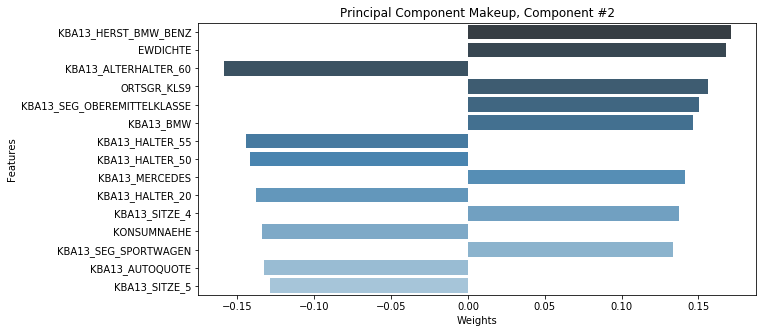

                                                                  Descriptions  \
Features                                                                         
KBA13_HERST_BMW_BENZ              share of BMW & Mercedes Benz within the PLZ8   
EWDICHTE                           density of inhabitants per square kilometer   
KBA13_ALTERHALTER_60         share of car owners between 46 and 60 within t...   
ORTSGR_KLS9                                              size of the community   
KBA13_SEG_OBEREMITTELKLASSE  share of upper middle class cars and upper cla...   
KBA13_BMW                                         share of BMW within the PLZ8   
KBA13_HALTER_55              share of car owners between 51 and 55 within t...   
KBA13_HALTER_50              share of car owners between 46 and 50 within t...   
KBA13_MERCEDES                               share of MERCEDES within the PLZ8   
KBA13_HALTER_20                   share of car owners below 21 within the PLZ8   
KBA13_SITZE_4   

In [83]:
# Display makeup of second principal component 
display_makeup_of_principal_component(pca.components_, feature_names, feature_descriptions, 2, 15)

**Feature Makeup:** large comunity size, high inhabitant density, high share of upper class cars as well as cars with less than 5 seats in the PLZ8, few car owners older than 46 and yonger than 21.

**Feature Interpretaion:** Urban Area/Metropolis Index

#### Principal Component 3

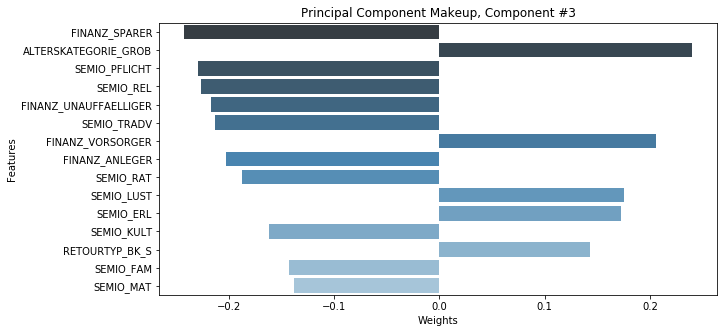

                                                            Descriptions  \
Features                                                                   
FINANZ_SPARER                            financial typology: money saver   
ALTERSKATEGORIE_GROB        age classification through prename analysis    
SEMIO_PFLICHT          affinity indicating in what way the person is ...   
SEMIO_REL              affinity indicating in what way the person is ...   
FINANZ_UNAUFFAELLIGER                   financial typology: unremarkable   
SEMIO_TRADV            affinity indicating in what way the person is ...   
FINANZ_VORSORGER                         financial typology: be prepared   
FINANZ_ANLEGER                              financial typology: investor   
SEMIO_RAT              affinity indicating in what way the person is ...   
SEMIO_LUST             affinity indicating in what way the person is ...   
SEMIO_ERL              affinity indicating in what way the person is ...   
SEMIO_KULT  

In [84]:
# Display makeup of third principal component 
display_makeup_of_principal_component(pca.components_, feature_names, feature_descriptions, 3, 15)

**Feature Makeup:** high savings, wealth management, great age, dutyfull-religious-rational-familiar minded

**Feature Interpretaion:** Financial Awareness Index

#### Principal Component 4

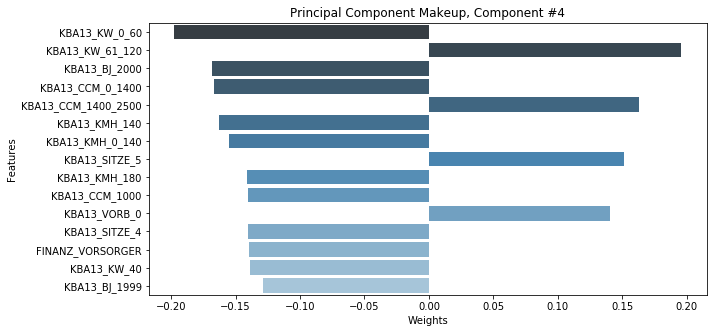

                                                          Descriptions  \
Features                                                                 
KBA13_KW_0_60            share of cars up to 60 KW engine power - PLZ8   
KBA13_KW_61_120      share of cars with an engine power between 61 ...   
KBA13_BJ_2000        share of cars built between 2000 and 2003 with...   
KBA13_CCM_0_1400     share of cars with less than 1400ccm within th...   
KBA13_CCM_1400_2500  share of cars with 1400ccm to 2499ccm within t...   
KBA13_KMH_140        share of cars with max speed between 110 km/h ...   
KBA13_KMH_0_140      share of cars with max speed 140 km/h within t...   
KBA13_SITZE_5                  number of cars with 5 seats in the PLZ8   
KBA13_KMH_180        share of cars with max speed between 110 km/h ...   
KBA13_CCM_1000       share of cars with less than 1000ccm within th...   
KBA13_VORB_0                     share of cars with no preowner - PLZ8   
KBA13_SITZE_4        number of cars wi

In [85]:
# Display makeup of fourth principal component 
display_makeup_of_principal_component(pca.components_, feature_names, feature_descriptions, 4, 15)

**Feature Makeup:** Region with low share of cars up to 60 KW engine power, less than 1400ccm, with max speed 140 km/h, less than 5 seats, built before 2003; high share of cars with engine power between 61 and 120 KW, with 1400ccm to 2499ccm, 5 seats; yonger car owners

**Feature Interpretaion:** Performance-Cars Region Index

### 6. K-Means Clustering

In [85]:
# Select optimal number of clusters with elbow method 
ks = range(1, 30)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(random_state=42, n_clusters=k, n_jobs=10)
    
    # Fit model to data
    model.fit(azdias_PCs)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
 

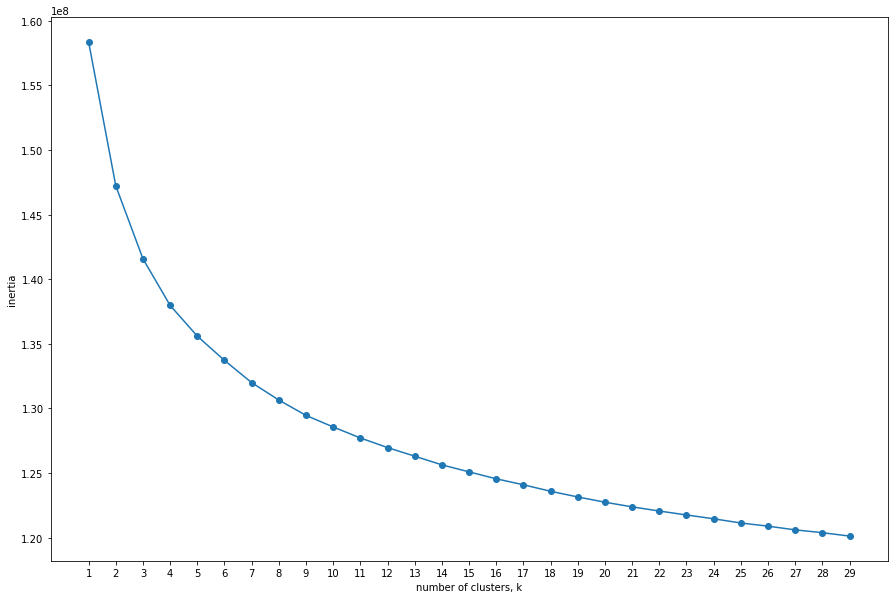

In [99]:
# Plot number of clusters K vs. inertia
plt.figure(figsize = (15, 10))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**Conclusion:** Inertia drops smoothly, the value is small enough with 20 clusters.

In [86]:
# Fit K-Means again with chosen optimal number of clusters
kmeans = KMeans(n_clusters=20, random_state=42, n_jobs=10).fit(features_PCA)

In [87]:
# Check out the clusters distribution
cluster_labels = pd.Series(kmeans.labels_+1).astype('category')
cluster_counts = cluster_labels.value_counts()
cluster_counts

17    73840
3     70029
16    62523
5     54882
12    52996
11    52695
10    50230
2     48026
15    47566
8     45532
6     45367
4     42832
14    41588
20    40534
1     35797
13    35491
18    32790
9     32580
19    32177
7     28317
dtype: int64

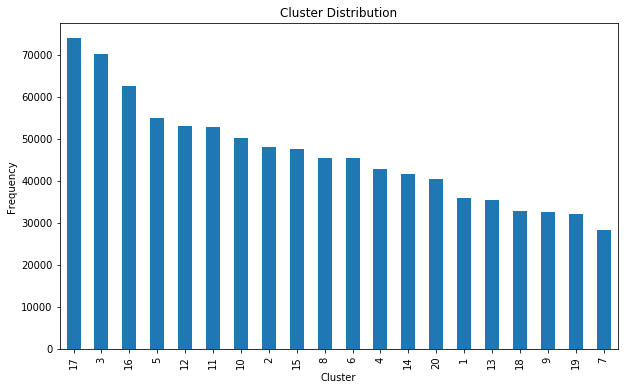

In [88]:
# Plot clusters distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

In [89]:
# Check out the dimension of the Cluster Centroids
kmeans.cluster_centers_.shape

(20, 113)

In [90]:
# Get all the Centroids in a DataFrame
PCA_feature_names = ['PC_' + str(i) for i in range(1, features_PCA.shape[1]+1)]
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, 
                                 columns=PCA_feature_names, 
                                 index=range(1,kmeans.n_clusters+1)).T   

In [91]:
# Print the Cluster Centroids with the first 10 PC dimension 
cluster_centroids.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
PC_1,1.905997,4.531604,-4.813697,7.074930,-3.551885,-1.875682,7.860416,5.029053,6.710390,0.668914,-2.567855,-1.679784,-6.429204,4.323058,0.828306,-5.149334,-1.890514,1.457816,-0.138097,-0.595633
PC_2,-7.262118,-0.115629,-2.382396,3.280701,1.792943,-1.369799,-2.095910,0.111657,-2.372748,2.869728,-4.879402,-1.836162,7.035127,3.387420,-0.304395,1.049477,-2.282482,8.413409,-3.288864,3.803621
PC_3,0.872820,1.744890,-0.543239,-0.748366,0.770878,-4.060644,-0.309312,-3.324516,5.548689,3.036578,-0.772564,-3.580753,1.293789,-1.750037,-0.432314,1.807385,1.577574,-0.049841,2.262853,-2.444067
PC_4,1.364787,-3.560261,-0.692355,-1.119578,-1.697344,1.477752,4.132423,-0.701019,2.259759,-0.249438,-2.036532,0.720664,0.817633,0.250918,-1.123981,1.250915,-1.611817,0.071280,4.548044,1.819899
PC_5,-0.289798,0.159930,-1.147027,0.453627,-1.596673,1.066976,-0.164502,1.468541,-0.431494,0.604728,-1.407568,0.521789,0.801673,-3.743207,0.972773,0.672452,1.327167,-0.696280,-0.889738,1.559214
PC_6,0.217150,0.491339,-1.573417,-0.449041,1.943911,2.225826,1.365996,0.818434,0.478435,-1.032437,-0.314553,-0.775274,0.932537,-0.175344,-2.942259,0.304930,1.004538,-0.259935,-0.581320,-1.074496
PC_7,-1.406616,0.564846,-1.268192,-2.081025,0.426606,-1.111430,0.324318,1.472218,0.299604,1.022801,-0.124452,2.372499,0.026468,0.089772,-0.654900,-0.058632,0.344794,-1.824969,-0.725607,1.468157
PC_8,2.402046,-0.743684,0.100538,1.060740,0.820141,-1.101932,0.784422,-0.773088,0.544186,-1.441552,-0.524162,1.087309,0.761593,-1.249690,-1.246670,-0.667977,-0.400036,1.611290,1.156282,0.133364
PC_9,-0.086184,0.665850,0.364370,-2.848092,0.586501,0.138872,1.263885,0.801603,1.274787,-0.012666,-1.716451,-0.459714,0.905008,-0.016623,1.232107,-0.606753,-0.374013,-1.310869,0.572408,0.760289
PC_10,0.838752,-0.055864,-0.568940,-0.408195,-0.396806,-0.046721,0.229636,0.373337,0.161441,0.409695,1.632014,-0.217875,1.502333,-0.745551,0.273093,-0.295355,-1.265461,-0.039633,0.030868,0.171562


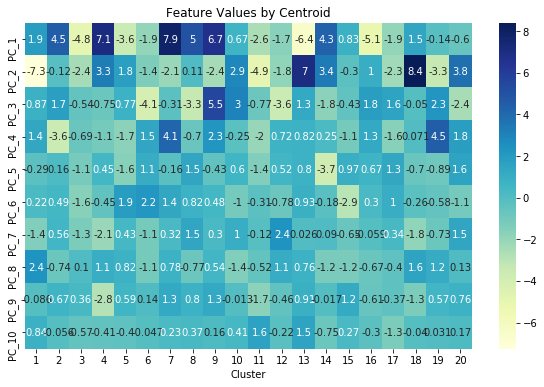

In [92]:
# Display above data with Heatmap
plt.figure(figsize = (10, 6))
ax = sns.heatmap(cluster_centroids.head(10), annot=True, cmap='YlGnBu')
ax.set_xlabel('Cluster')
plt.title('Feature Values by Centroid')
plt.show()

**Conclusion:** the top 4 PCs seem to have dominant values against the others among all the clusters, we will only focus on those features in the next section. 

### 7. Cluster Analysis and Customer Segmentation 
In this part, we will draw the costomer's profile by analyzing the correlation between dominating features and customer ratio of the clusters: the higher customer ratio one cluster has, the better the characteristics of this cluster could describe our customers.

In [93]:
# Print the cluster distribustions of the customers
customers_cluster_labels = cluster_labels[demo_labels_sub==1]

customers_cluster_counts = customers_cluster_labels.value_counts()
customers_cluster_counts

16    22109
17    20687
3     18317
5     16045
13    11682
11    10157
10     9959
2      5667
18     4552
15     4194
4      2739
19     2674
9      2308
6      2185
1      1963
14     1666
20     1312
12     1296
8       512
7       347
dtype: int64

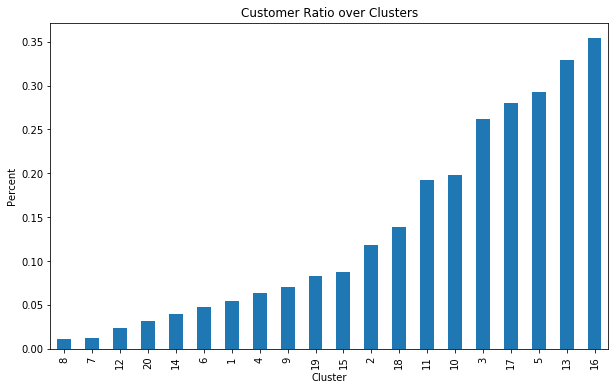

In [94]:
# Sort clusters by customer ratio in ascending order
customuer_ratio_sorted = (customers_cluster_counts/cluster_counts).sort_values()

# Plot customer ratio vs. cluster label
customuer_ratio_sorted.plot(kind='bar', figsize=[10, 6])
plt.xlabel('Cluster')
plt.ylabel('Percent')
plt.title('Customer Ratio over Clusters')
plt.show()

In [95]:
# Print the Centroids with the top 4 PC dimension
cluster_centroids.iloc[0:4, customuer_ratio_sorted.index.to_numpy()-1]

,8,7,12,20,14,6,1,4,9,19,15,2,18,11,10,3,17,5,13,16
PC_1,5.029053,7.860416,-1.679784,-0.595633,4.323058,-1.875682,1.905997,7.074930,6.710390,-0.138097,0.828306,4.531604,1.457816,-2.567855,0.668914,-4.813697,-1.890514,-3.551885,-6.429204,-5.149334
PC_2,0.111657,-2.095910,-1.836162,3.803621,3.387420,-1.369799,-7.262118,3.280701,-2.372748,-3.288864,-0.304395,-0.115629,8.413409,-4.879402,2.869728,-2.382396,-2.282482,1.792943,7.035127,1.049477
PC_3,-3.324516,-0.309312,-3.580753,-2.444067,-1.750037,-4.060644,0.872820,-0.748366,5.548689,2.262853,-0.432314,1.744890,-0.049841,-0.772564,3.036578,-0.543239,1.577574,0.770878,1.293789,1.807385
PC_4,-0.701019,4.132423,0.720664,1.819899,0.250918,1.477752,1.364787,-1.119578,2.259759,4.548044,-1.123981,-3.560261,0.071280,-2.036532,-0.249438,-0.692355,-1.611817,-1.697344,0.817633,1.250915


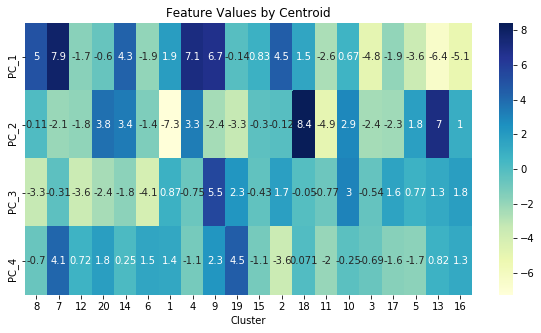

In [96]:
# Display the data above with heatmap 
plt.figure(figsize = (10, 5))
ax = sns.heatmap(cluster_centroids.iloc[0:4, customuer_ratio_sorted.index.to_numpy()-1], annot=True, cmap='YlGnBu')
ax.set_xlabel('Cluster')
plt.title('Feature Values by Centroid')
plt.show()

**Conclusion:**

1. *PC_1* (lower class index) is significantly negative correlated with customer ratio over all clusters.

2. *PC_2* (Urban Area/Metropolis Index) dosn't show constistent correlation with customer ratio.

3. *PC_3* (Financial Awareness Index) has positive correlation with customer ratio.

4. *PC_4* (Performance-Cars Region Index) has negative correlation with customer ratio.


#### CUSTOMER PROFILE:

*Our customers have good income and high social status; they might live in urban area and metropolis as well as rural area and small towns; they are elder people who save money and have active financial investment; they are yong people live in regions with high share of small low power cars.*


### 8. Customer Segmentation with Categorical Variables

In [95]:
# Check out names of categorical features
feature_categorical_names = features_categorical.columns
feature_categorical_names

Index(['CAMEO_DEU_2015', 'LP_FAMILIE_FEIN', 'PRAEGENDE_JUGENDJAHRE',
       'ANREDE_KZ', 'GEBAEUDETYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'NATIONALITAET_KZ', 'OST_WEST_KZ', 'SHOPPER_TYP',
       'SOHO_KZ', 'VERS_TYP'],
      dtype='object')

In [96]:
# Extract categorical features and class labels
data_categorical = features_categorical
data_categorical['CLASS'] = demo_labels_sub

In [97]:
# Delete redundant variable
del features_categorical

#### 1. For Simplicity and Interpretability, Select Only The Most Informative Ones

In [98]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [99]:
# Prepare input data
oe = OrdinalEncoder()
X_categorical_encoded = oe.fit_transform(data_categorical.drop(columns=['CLASS']).astype('str'))

le = LabelEncoder()
y_categorical_encoded = le.fit_transform(data_categorical['CLASS'].astype('str'))

In [100]:
# Calculate scores of features' predictive ability
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_categorical_encoded, y_categorical_encoded)

SelectKBest(k='all', score_func=<function mutual_info_classif at 0x1a29d83cb0>)

Feature 0: 0.024959
Feature 1: 0.029728
Feature 2: 0.095534
Feature 3: 0.055206
Feature 4: 0.035973
Feature 5: 0.031922
Feature 6: 0.032456
Feature 7: 0.067898
Feature 8: 0.012359
Feature 9: 0.113596
Feature 10: 0.047746
Feature 11: 0.000000
Feature 12: 0.044108


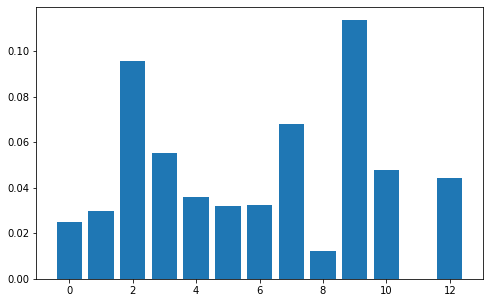

In [101]:
# Print the scores
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# Plot the scores
plt.figure(figsize = (8, 5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

**Conclusion:** 2, 3, 7, 9 are most relevant, we will keep them only.

In [102]:
# Check out the names of selected features
categorical_feature_names_selected = feature_categorical_names[[2, 3, 7, 9]]
categorical_feature_names_selected

Index(['PRAEGENDE_JUGENDJAHRE', 'ANREDE_KZ', 'HEALTH_TYP', 'OST_WEST_KZ'], dtype='object')

#### 2. Customer Analysis

In [103]:
def display_customer_ratios_of_categories(feature_name, data_categorical):
    """
    The function barplots customer ratios in ascending order against categories.
    """
    
    customers_value_counts = data_categorical.loc[data_categorical.CLASS==1, feature_name].value_counts()
    all_value_counts = data_categorical[feature_name].value_counts()
    
    customer_ratio = (customers_value_counts/all_value_counts).sort_values()
    
    if customer_ratio.index.to_numpy().dtype == 'float64':
        customer_ratio.index = customer_ratio.index.to_numpy().astype('int')
    
    customer_ratio.plot(kind='bar', figsize=[8, 4])
    plt.xlabel('Category')
    plt.ylabel('Customer Ratio')
    plt.title(feature_name)

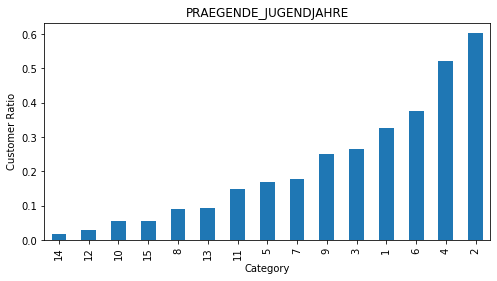

In [104]:
# Display customer ratio distribution of PRAEGENDE_JUGENDJAHRE
display_customer_ratios_of_categories(categorical_feature_names_selected[0], data_categorical)

**Conclusion:** surprisingly, category 2 and 4 has significantly high customer proportion, it's even biger than gerneral population proportion. This implies that people born in 40ies-reconstruction years and 50ies-milk bar/Individualisation time are more likely to be our customers.

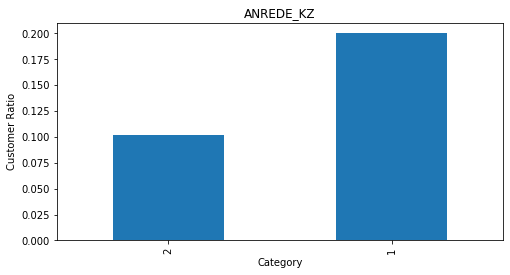

In [105]:
# Display customer ratio distribution of ANREDE_KZ
display_customer_ratios_of_categories(categorical_feature_names_selected[1], data_categorical)

**Conclusion:** males are more likely to be our customers as females.

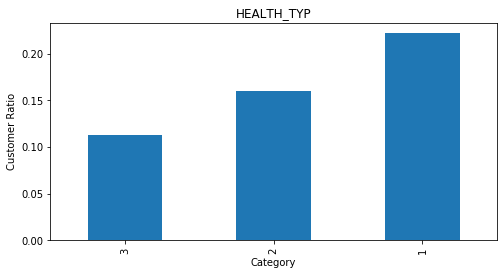

In [106]:
# Display customer ratio distribution of HEALTH_TYP
display_customer_ratios_of_categories(categorical_feature_names_selected[2], data_categorical)

**Conclusion:** critical-reserved health type is most likely to be our customer, followed by sanitary-affine and aunty-hedonists.

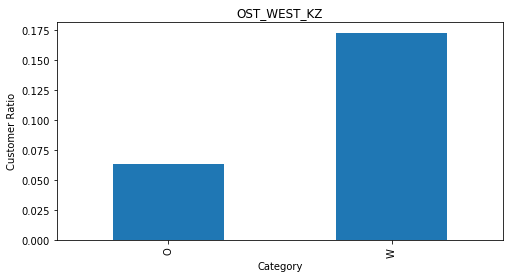

In [107]:
# Display customer ratio distribution of OST_WEST_KZ
display_customer_ratios_of_categories(categorical_feature_names_selected[3], data_categorical)

**Conclusion:** people live in former West Germany are much more likely to become our customers than in former East Germany.